## Referências

1. **ISL with Python**  
   - James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). *An Introduction to Statistical Learning with Applications in R* (Python adaptations available, ed. 2023). Springer.

2. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition**  
   - Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.


3. **Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina, 2ª Edição**  
- Faceli, K., Lorena, A. C., Gama, J., & Carvalho, A. C. P. L. F. (2018). *Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina* (2ª Edição). LTC.

# ML in Life Sciences - Class 6: End-to-End Machine Learning Project

## Fine-Tuning your models

We will assume that we have a preselected list of promising ML classifers. Thus we will need to fine-tune this models, and select the 'best' model for aour particualar case.

**Semester:** 2024.2

---
This notebook is part of the crash course "Machine Learning in Life Sciences" aimed at graduate students in biological sciences.

---
**Prof.** Ignacio Sánchez-Gendriz

**Date:** September 13, 2024

Class 6:  [![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1hnKlCz4LrvTDu-72fL2GGSzts8HOk96O?authuser=1)

Note: Class 6 is a continuation of Class 5.

Class 5: [![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1XHDxwpcg2-fSEek4fs6eMVowwehMpCb-?authuser=1)

## Introduction

In this section, we will analyze a dataset containing length measurements for four species of shrimp:

1. **FB:** *Farfantepenaeus brasiliensis* (F. brasiliensis)
2. **FI:** *Farfantepenaeus isabelae* (F. isabelae)
3. **FP:** *Farfantepenaeus paulensis* (F. paulensis)
4. **FS:** *Farfantepenaeus subtilis* (F. subtilis)

### Main Objective

Develop ML classifiers to automatically differentiate between the analyzed shrimp species.

### Specific Objectives

1. **Load and Clean Data:** Import the dataset and perform necessary cleaning to handle missing values, outliers, and inconsistencies.
2. **Explore and Visualize Data:** Conduct exploratory data analysis (EDA) to understand data distribution and uncover patterns.
3. **Prepare Data for Machine Learning:** Preprocess the data through feature engineering, scaling, and encoding as needed for machine learning algorithms.
4. **Select and Train Models:** Identify suitable classification models, train them, and evaluate their initial performance.
5. **Model Selection:** Compare the performance of trained models using appropriate metrics to select the best-performing model.
6. **Fine-Tune the Model:** Optimize the selected model’s hyperparameters to improve accuracy and robustness.
7. **Present the Results:** Summarize the findings, interpret the model's performance, and discuss its potential applications.


Here's a revised version of the text section:

---

## Material and Methods

### Dataset

The dataset consists of measurements from 164 individuals. For each individual, the cephalothorax length (standard length - $CC$) was measured. Additionally, the sulcus length (CS) and five distances ($P_1, P_2, P_3, P_4, P_5$) were measured for each groove (adrostral - abbreviated as ad; abdominal - abbreviated as AB).

To normalize the measurements and minimize the effect of individual size, all measurements were divided by the cephalothorax length ($CC$). This normalization step aimed to preserve the relative proportions of the distances.

The images below illustrate the measurements captured in the dataset that will be analyzed.

### Image 1
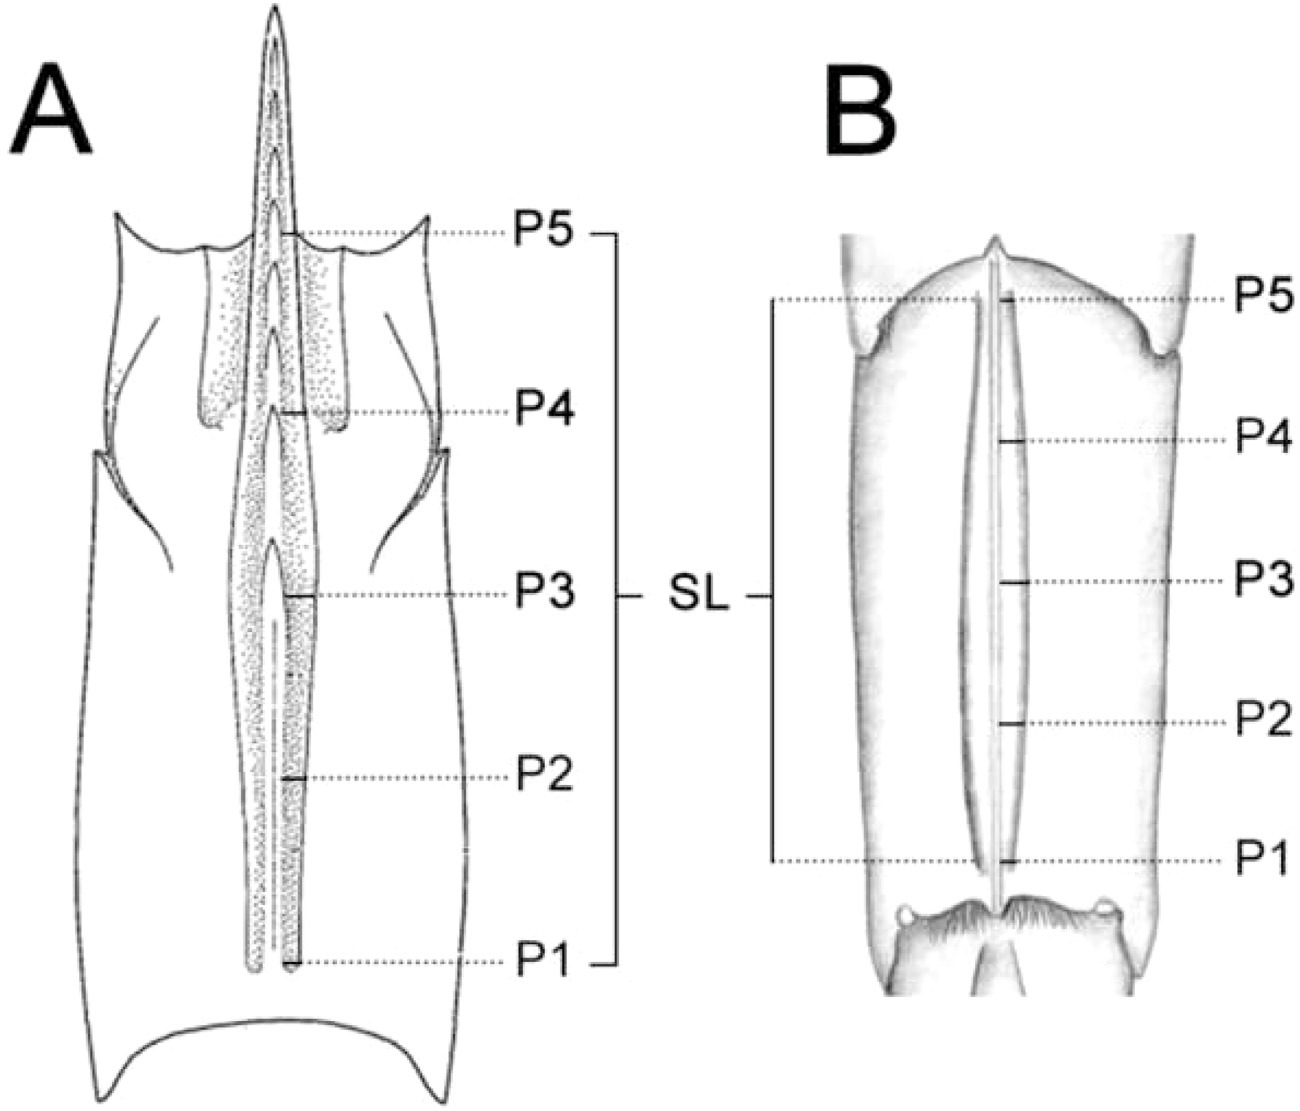

### Image 2

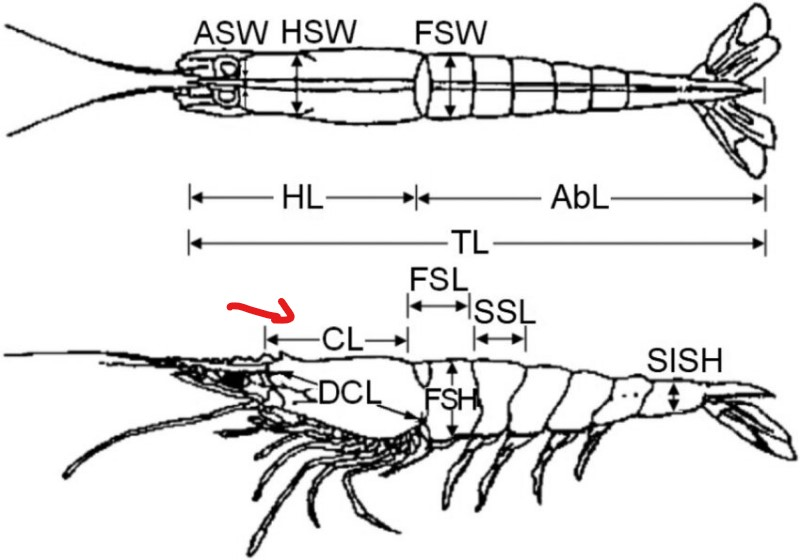

## Loading, Cleaning and Preprocessing the dataset

In [ ]:
# Step 1: Import necessary libraries (general ones)
import numpy as np
import pandas as pd

# Step 2: Import necessary libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns

In [ ]:
# Set Seaborn style and context for academic plots
sns.set_style("whitegrid", {'grid.linestyle': '--'})  # White background with dashed grid lines
sns.set_context("paper")  # Adjust context to "talk" or "poster" for presentations

# Enable TeX mode for high-quality text rendering
mpl.rcParams['font.family'] = 'serif'

# Configure legend aesthetics
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "black"
mpl.rcParams['legend.framealpha'] = 1  # Full opacity for better readability

# Adjust figure size for clarity
plt.rcParams['figure.figsize'] = [8, 6]  # Width, height in inches

# Configure axes spines
plt.rcParams['axes.edgecolor'] = 'black'  # Set the border of the axes to black
plt.rcParams['axes.linewidth'] = 0.5  # Set the width of the axes border

In [ ]:
# Loading the dataset
df_raw = pd.read_csv('Shrimp_Length_Raw.csv')
df_raw.head()

,SP,CC,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
0,FB,24.55,11.86,0.18,0.32,0.55,0.48,0.52,22.65,0.35,0.48,0.88,0.59,0.25
1,FB,19.05,9.09,0.21,0.36,0.46,0.54,0.48,17.75,0.33,0.44,0.68,0.52,0.25
2,FB,21.58,9.38,0.30,0.38,0.42,0.42,0.36,20.20,0.38,0.66,0.79,0.59,0.33
3,FB,17.95,9.35,0.26,0.38,0.53,0.44,0.29,16.61,0.28,0.45,0.57,0.44,0.24
4,FB,16.85,8.37,0.17,0.26,0.33,0.27,0.26,16.08,0.29,0.38,0.53,0.34,0.25


In [ ]:
# Preprocessing the dataset
# Divide each feature in df_raw.iloc[:, 2:] by the cephalothorax length (CC) located in df_raw.iloc[:, 1]
df_preprocessed = df_raw.copy()
df_preprocessed.iloc[:, 2:] = df_raw.iloc[:, 2:].div(df_raw.iloc[:, 1], axis=0)

# Drop column CC
df_preprocessed.drop(columns=['CC'], inplace=True)

# Display the first few rows of the preprocessed DataFrame
df_preprocessed.head()

,SP,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
0,FB,0.483096,0.007332,0.013035,0.022403,0.019552,0.021181,0.922607,0.014257,0.019552,0.035845,0.024033,0.010183
1,FB,0.477165,0.011024,0.018898,0.024147,0.028346,0.025197,0.931759,0.017323,0.023097,0.035696,0.027297,0.013123
2,FB,0.434662,0.013902,0.017609,0.019462,0.019462,0.016682,0.936052,0.017609,0.030584,0.036608,0.027340,0.015292
3,FB,0.520891,0.014485,0.021170,0.029526,0.024513,0.016156,0.925348,0.015599,0.025070,0.031755,0.024513,0.013370
4,FB,0.496736,0.010089,0.015430,0.019585,0.016024,0.015430,0.954303,0.017211,0.022552,0.031454,0.020178,0.014837


*Note*: I will create a split of the dataset the will have suffient samples in test set, in relation to train set (60 - 40 split), becuuse I will likt yo have a stric test classier performance. Also I will like to test data augmentation in train test (as for example smote).


In [ ]:
# Split the dataset

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_preprocessed, test_size=0.3, random_state=42)#, stratify=df_preprocessed['SP'])

print(f"Training set size: {len(train_set)}. Representing {(len(train_set)/len(df_preprocessed)*100):.2f} %")
print(f"Test set size: {len(test_set)}. Representing {(len(test_set)/len(df_preprocessed)*100):.2f} %")

# Note I will create a split with a

Training set size: 114. Representing 69.51 %
Test set size: 50. Representing 30.49 %


In [ ]:
# see data distribuition for train
train_set.describe()

,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.505928,0.008464,0.012717,0.016721,0.013886,0.011363,0.916759,0.009766,0.015860,0.025212,0.018244,0.009824
std,0.076832,0.002449,0.004090,0.005243,0.005459,0.005248,0.032868,0.004350,0.005714,0.006186,0.003568,0.002781
min,0.340375,0.003133,0.004781,0.006967,0.004810,0.002608,0.814165,0.002526,0.004683,0.011648,0.010399,0.003374
25%,0.452225,0.006798,0.010223,0.013276,0.010712,0.008002,0.894860,0.006112,0.010143,0.020250,0.016027,0.007973
50%,0.496944,0.008390,0.012596,0.016831,0.013237,0.010669,0.919137,0.009316,0.017308,0.025328,0.018032,0.009911
75%,0.550553,0.009526,0.015422,0.019521,0.016467,0.014278,0.940142,0.012724,0.020490,0.029994,0.020100,0.011461
max,0.755324,0.015485,0.022633,0.029526,0.028346,0.025537,0.981516,0.020387,0.030171,0.038026,0.029557,0.016110


### Analysis of Scale Differences:

1. **Feature Ranges and Means:**
   - The features `CSab`, `P1ab`, `P2ab`, `P3ab`, `P4ab`, and `P5ab` have mean values that range from approximately 0.008 to 0.506, with `CSab` being notably larger in scale compared to the `P` features.
   - The `CSad` feature has a mean of around 0.915, which is substantially larger than the means of the other features.
   
2. **Standard Deviation and Spread:**
   - The standard deviations (`std`) reflect the spread of each feature, with `CSab` and `CSad` having larger variations compared to the `P` features. `CSad` particularly shows a larger spread (`std` = 0.032995) compared to the others.
   
3. **Range Differences:**
   - The maximum values also highlight differences in scales, with `CSab` reaching up to 0.755 and `CSad` reaching up to 0.981, while the `P` features remain below 0.04.

### Recommendation:

Given the scale differences, particularly between `CSad`, `CSab`, and the `P` features, it is essential to apply scaling or normalization to ensure consistency and improve model performance. Here’s why:

- **Consistency Across Features:** Scaling ensures that all features contribute equally to the model, especially in algorithms that are sensitive to feature scales, such as SVM and k-NN. Without scaling, features on larger scales can disproportionately influence the model, leading to biased results.

- **Improved Model Performance:** Scaling helps many machine learning algorithms converge faster and perform better by ensuring that feature values are on a comparable scale. This reduces the likelihood of the model becoming biased toward features with larger ranges.

- **Handling Outliers and Zero-Centered Data Needs:** While Min-Max Scaling (0-1 normalization) adjusts data to a specific range, it can be adversely affected by outliers, skewing the distribution and causing typical values to cluster at lower ranges. For models like Artificial Neural Networks (ANNs) that perform better with zero-mean data, Standard Scaling (z-score normalization) is often a better choice as it centers the data around zero and scales it to unit variance.

### Suggested Scaling Method:

**Standard Scaling (Z-score normalization):** Given the considerations, Standard Scaling is recommended because it mitigates the impact of outliers and better aligns with models that require zero-centered data. This method scales features based on the mean and standard deviation, making it more robust to variations and enhancing the overall model performance.

### Final Thoughts:

Switching to Standard Scaling will align feature scales, reduce the impact of outliers, and better suit models that benefit from data centered around zero. This approach will enhance your model’s performance and interpretability without distorting the inherent structure of the data, making it particularly useful given the scale differences observed in your dataset.

In [ ]:
# Example Code for Min-Max Scaling:
X_test, y_test = test_set.drop('SP', axis=1), test_set['SP']
X_train, y_train = train_set.drop('SP', axis=1), train_set['SP']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the Standard Scaler (i.e., z-score normalization)
scaler = StandardScaler() # We could selet MinMaxScaler instead

# Apply Min-Max Scaling to the training set
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled =  pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Apply the same scaling to the test set (using the same scaler fit on training data)
X_test_scaled = scaler.transform(X_test)
X_test_scaled =  pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print("Scaled Training Data:")
X_train_scaled.describe()

Scaled Training Data:


,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
count,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02
mean,4.772011e-17,-2.239924e-16,5.960145e-16,2.142536e-17,-3.486490e-16,-1.071268e-16,-2.782862e-16,-3.135893e-16,2.814513e-16,5.590070e-16,1.364040e-16,-3.408579e-16
std,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00
min,-2.164253e+00,-2.186802e+00,-1.949097e+00,-1.868617e+00,-1.669915e+00,-1.675746e+00,-3.135224e+00,-1.671496e+00,-1.964825e+00,-2.202482e+00,-2.208553e+00,-2.329104e+00
25%,-7.020447e-01,-6.834894e-01,-6.123213e-01,-6.599198e-01,-5.839434e-01,-6.432178e-01,-6.692421e-01,-8.436830e-01,-1.005045e+00,-8.057078e-01,-6.241016e-01,-6.681538e-01
50%,-1.174384e-01,-3.049637e-02,-2.954948e-02,2.103378e-02,-1.194129e-01,-1.329094e-01,7.265064e-02,-1.038719e-01,2.546218e-01,1.878768e-02,-5.977361e-02,3.172244e-02
75%,5.833750e-01,4.355542e-01,6.644895e-01,5.363149e-01,4.749778e-01,5.579907e-01,7.145450e-01,6.829841e-01,8.139809e-01,7.764497e-01,5.223011e-01,5.912254e-01
max,3.260331e+00,2.879654e+00,2.435362e+00,2.452979e+00,2.660747e+00,2.712806e+00,1.978911e+00,2.452153e+00,2.515676e+00,2.080538e+00,3.184512e+00,2.270183e+00


In [ ]:
# Display the first few rows of the scaled test data
print("\nScaled Test Data:")
X_test_scaled.describe()


Scaled Test Data:


,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.249026,-0.015938,0.005706,-0.087661,0.018928,0.116620,-0.019202,0.008085,-0.105307,-0.135802,-0.328134,-0.104236
std,0.775100,0.941185,1.028260,0.945695,0.963979,1.011794,1.057725,1.047063,0.911954,1.056298,1.103534,0.891953
min,-1.937379,-2.003915,-1.867572,-1.837673,-1.491337,-1.590110,-2.718213,-1.447754,-1.731828,-2.386507,-2.840043,-1.784655
25%,-0.778593,-0.577659,-0.712873,-0.793695,-0.629195,-0.585597,-0.754701,-0.737140,-0.743449,-0.914082,-1.056249,-0.755933
50%,-0.190598,-0.235840,-0.207256,-0.223044,-0.248028,-0.029774,0.093967,-0.200266,-0.106034,-0.123410,-0.326593,-0.120661
75%,0.251769,0.582951,0.757708,0.755266,0.692527,0.994891,0.733776,0.564381,0.529477,0.528725,0.226887,0.397930
max,1.489247,2.230116,2.110494,1.675485,1.961244,2.219839,1.802601,2.605872,2.588338,2.012764,2.560553,1.974830


### Note

#### Scaling the data using information from the training set only, without incorporating the complete dataset:

When applying scaling or normalization to your data, it is crucial to apply the same scaling to both the training and test sets using the scaler fitted on the training data. This ensures that the test data is transformed consistently with the training data, preserving the relationships and distributions learned during training.

**Why This Is Necessary:**

1. **Consistency:** Scaling the test set with the same parameters (mean, standard deviation, min, and max values) obtained from the training set ensures that the test data is treated in the same way as the training data. This consistency is essential for fair evaluation because it mimics how new, unseen data would be processed in real-world applications.

2. **Avoid Data Leakage:** Fitting the scaler on the training set only avoids data leakage, where information from the test set could influence the training process, leading to overly optimistic model performance estimates. Using the test set to fit the scaler would incorporate future information that the model should not have access to, compromising the integrity of the evaluation.

3. **Realistic Evaluation:** Applying the scaler fitted on the training data to the test data ensures that your evaluation metrics reflect the model’s performance on data processed under the same conditions as it would encounter in practical use, thus providing a realistic assessment of model performance.

By maintaining this practice, you ensure that your model evaluation is accurate and unbiased, reflecting how well the model is likely to perform on real, unseen data.

## Create a Class-Balanced Dataset Using the SMOTE Technique

When working with datasets that have an uneven distribution of classes, models can become biased towards the majority classes, resulting in poor performance on the minority classes. This is a common issue in many real-world datasets, including biological data where some classes (e.g., species, conditions) might be underrepresented due to experimental constraints or collection difficulties.

**Synthetic Minority Over-sampling Technique (SMOTE)** is a data augmentation technique used to address class imbalance by generating synthetic samples for the minority class. It works by creating new instances that are interpolations between existing minority class samples, rather than duplicating data points.

### How SMOTE Works:

1. **Identify Minority Samples:** SMOTE identifies the samples belonging to the minority class.
2. **Generate Synthetic Samples:** For each minority sample, SMOTE selects one of its k-nearest neighbors from the same class. A synthetic data point is then created along the line segment between the sample and its neighbor.
3. **Repeat:** This process is repeated until the minority class is augmented to the desired level, creating a more balanced dataset.

### Why SMOTE is Beneficial in This Case:

Our dataset, the imbalance is primarily due to experimental issues, such as difficulties in collecting the same number of individuals for each shrimp species class. This imbalance could lead to a model that performs well on majority classes but poorly on underrepresented species, which may not reflect the true diversity of your data.

Applying SMOTE in this scenario offers several benefits:

- **Improved Model Training:** By balancing the training data, SMOTE allows the model to learn equally from all classes, reducing bias toward the majority class and improving the model’s ability to generalize to all species.
- **Better Performance on Minority Classes:** Models trained on balanced datasets tend to perform better on minority classes, which is crucial when each class is equally important, such as when distinguishing between different shrimp species.
- **Preserving Feature Relationships:** Unlike random oversampling that duplicates existing data points, SMOTE generates synthetic samples that maintain the relationships between features, providing a more realistic augmentation that helps the model learn meaningful patterns.

By applying SMOTE, you create a balanced training set that can lead to more robust and fairer classifiers. This approach helps ensure that your model's performance is not skewed by the experimental imbalance in your original data, making it a suitable choice for your analysis.

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Verifying the results
print(f"Original training set size: {len(y_train)}")
print(f"Training set size after SMOTE: {len(y_train_smote)}")

print('\nDistribution of classes for test: ', y_test.value_counts())
print('\nDistribution of classes for train: ', y_train.value_counts())
print('\nDistribution of classes for train_smote: ', y_train_smote.value_counts())

Original training set size: 114
Training set size after SMOTE: 152

Distribution of classes for test:  SP
FS    16
FB    14
FI    12
FP     8
Name: count, dtype: int64

Distribution of classes for train:  SP
FS    38
FI    29
FB    28
FP    19
Name: count, dtype: int64

Distribution of classes for train_smote:  SP
FP    38
FB    38
FI    38
FS    38
Name: count, dtype: int64


### Feature selection techniques

### 1. **Recursive Feature Elimination (RFE)**

#### Overview:
Recursive Feature Elimination (RFE) is an iterative method for feature selection that aims to identify the most relevant subset of features by recursively evaluating smaller sets of features rather than ranking features individually. It starts with the complete set of features and progressively removes the least important ones based on their collective contribution to the model’s performance. This method is particularly effective when interactions and dependencies between features are important to capture.

#### How RFE Works:
- **Initial Model Training:** RFE begins by training a model on the entire dataset using all available features. The model can be any estimator that provides a measure of feature importance, such as coefficients in linear models or feature importances in tree-based models (e.g., Random Forest ensemble). This initial step establishes a baseline for understanding how the full feature set contributes to the model's predictive performance.
  
- **Subset Evaluation Rather Than Individual Ranking:** Unlike methods like Fisher Score that rank features independently based on their individual contributions, RFE evaluates the performance of feature subsets. This allows RFE to account for interactions between features, as the importance of a feature may depend on the presence or absence of other features in the subset.

- **Feature Elimination:** After the initial model is trained, RFE ranks the features based on their importance within the subset. The least important feature is removed, and the model is retrained on the reduced feature set. This process helps to identify not just individually important features, but combinations of features that work well together.

- **Recursive Steps:** This recursive elimination process continues, removing one feature at a time and retraining the model at each step. The recursive nature allows RFE to refine the feature set progressively, ultimately focusing on the subset of features that collectively contribute the most to model performance. This differs from individual ranking methods as it adapts to the evolving feature space during the elimination process.

#### Benefits of RFE:
- **Captures Feature Interactions:** By retraining the model at each iteration, RFE considers the interaction and interdependence between features, which can lead to a more nuanced and effective feature selection process compared to methods that evaluate features in isolation.
  
- **Subset Evaluation Over Individual Ranking:** RFE’s strength lies in its ability to evaluate subsets rather than individual features. This can be particularly beneficial when features are correlated or when their combined effect is more significant than their individual contributions.

- **Versatile and Model-Agnostic:** RFE is compatible with any model that can provide feature importances, making it adaptable to a wide range of scenarios, from linear models to complex ensemble methods.

- **Reduces Overfitting:** By systematically eliminating less important features, RFE simplifies the model, reducing the risk of overfitting, especially in high-dimensional datasets where many features may be irrelevant or redundant.

#### Use Cases:
- **High-Dimensional Data:** RFE is highly effective in scenarios involving datasets with a large number of features, particularly when there are complex relationships among them that need to be preserved during feature selection.
  
- **Model Performance Optimization:** By selecting features that collectively enhance the model's predictive accuracy, RFE can help improve the model’s performance and generalizability, leading to better results on unseen data.

### Summary:
RFE’s approach of evaluating subsets of features, rather than focusing solely on individual rankings, sets it apart from other feature selection methods like Fisher Score. This allows RFE to effectively capture feature interactions and dependencies, making it a powerful tool for identifying the most valuable feature subsets for your model.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model for RFE - using RandomForestClassifier as the estimator
# RandomForestClassifier is chosen because it provides feature importances, which are used by RFE for ranking
model = RandomForestClassifier(random_state=42)

# Define RFE with the chosen model and set to select the top 5 features
# Setting n_features_to_select=5 directs RFE to identify the top 5 features based on the model's performance
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE on the training data
# This step trains the RandomForest model and recursively eliminates the least important features until the top 5 remain
rfe.fit(X_train_smote, y_train_smote)

# Get the ranking of all features
# ranking_rfe gives the rank of each feature, where 1 indicates the most important features included in the top 5
# The reaming indexs ranking_rfe indicate consecutive rank, low index are more important ones
ranking_rfe = rfe.ranking_

# Sort the ranks to reflect the most important feature indices first
# ranking_rfe_sorted provides the indices of features ordered by their importance, from most to least important
ranking_rfe_sorted = ranking_rfe.argsort()

# Extract the feature names based on the ranking
# This will allow you to identify which specific features are ranked in order of importance
features = X_train_smote.columns
selected_features_rfe = features[ranking_rfe_sorted][:5]

# Print the top 5 selected features and their ranking according to RFE
# This shows the features RFE identified as the top 5, highlighting differences or similarities to Fisher Score
print(f"\nTop 5 features selected by RFE:\n {', '.join(selected_features_rfe)}")


Top 5 features selected by RFE:
 P3ab, P4ab, P5ab, P1ad, P2ad


### Test results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# 1. Train with all features
# Fit the model on the training data with all features
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the training and test sets
y_pred_train_all = rf_model.predict(X_train_smote)
y_pred_test_all = rf_model.predict(X_test_scaled)

# Compute metrics for all features
metrics_all_features = {
    'Accuracy': [accuracy_score(y_train_smote, y_pred_train_all), accuracy_score(y_test, y_pred_test_all)],
    'Recall': [recall_score(y_train_smote, y_pred_train_all, average='weighted'), recall_score(y_test, y_pred_test_all, average='weighted')],
    'Precision': [precision_score(y_train_smote, y_pred_train_all, average='weighted'), precision_score(y_test, y_pred_test_all, average='weighted')],
    'F1-Score': [f1_score(y_train_smote, y_pred_train_all, average='weighted'), f1_score(y_test, y_pred_test_all, average='weighted')]
}

# 2. Train with selected features from Fisher Score
# Subset training and test data with selected features
X_train_rfe = X_train_smote[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

# Fit the model on the training data with selected features
rf_model.fit(X_train_rfe, y_train_smote)

# Predict on the training and test sets
y_pred_train_rfe = rf_model.predict(X_train_rfe)
y_pred_test_rfe = rf_model.predict(X_test_rfe)

# Compute metrics for selected features
metrics_selected_features = {
    'Accuracy': [accuracy_score(y_train_smote, y_pred_train_rfe), accuracy_score(y_test, y_pred_test_rfe)],
    'Recall': [recall_score(y_train_smote, y_pred_train_rfe, average='weighted'), recall_score(y_test, y_pred_test_rfe, average='weighted')],
    'Precision': [precision_score(y_train_smote, y_pred_train_rfe, average='weighted'), precision_score(y_test, y_pred_test_rfe, average='weighted')],
    'F1-Score': [f1_score(y_train_smote, y_pred_train_rfe, average='weighted'), f1_score(y_test, y_pred_test_rfe, average='weighted')]
}

# Create DataFrame to store performance metrics for the test set
df_performance = pd.DataFrame({
    'Accuracy': [metrics_all_features['Accuracy'][1], metrics_selected_features['Accuracy'][1]],
    'Recall': [metrics_all_features['Recall'][1], metrics_selected_features['Recall'][1]],
    'Precision': [metrics_all_features['Precision'][1], metrics_selected_features['Precision'][1]],
    'F1-Score': [metrics_all_features['F1-Score'][1], metrics_selected_features['F1-Score'][1]]
}, index=['All_Features', 'Selected_Features'])

# Create DataFrame to store performance metrics for the training set
df_train = pd.DataFrame({
    'Accuracy': [metrics_all_features['Accuracy'][0], metrics_selected_features['Accuracy'][0]],
    'Recall': [metrics_all_features['Recall'][0], metrics_selected_features['Recall'][0]],
    'Precision': [metrics_all_features['Precision'][0], metrics_selected_features['Precision'][0]],
    'F1-Score': [metrics_all_features['F1-Score'][0], metrics_selected_features['F1-Score'][0]]
}, index=['All_Features', 'Selected_Features'])

# Display the performance metrics
print("Training Set Performance Metrics:")
print(df_train)

print("\nTest Set Performance Metrics:")
print(df_performance)

Training Set Performance Metrics:
                   Accuracy  Recall  Precision  F1-Score
All_Features            1.0     1.0        1.0       1.0
Selected_Features       1.0     1.0        1.0       1.0

Test Set Performance Metrics:
                   Accuracy  Recall  Precision  F1-Score
All_Features           0.86    0.86   0.869706  0.856531
Selected_Features      0.86    0.86   0.869706  0.856531


### Discussion of Results

The performance metrics obtained from training and testing the Random Forest classifier with both all features and selected features (via Fisher Score) provide valuable insights into the model's behavior and effectiveness. Below, we explore these results in detail.

#### Training Set Performance:
- **Metrics Overview:**
  - For both models (All Features and Selected Features), the metrics on the training set are perfect: Accuracy, Recall, Precision, and F1-Score are all 1.0.
  
- **Interpretation:**
  - These perfect scores suggest that the model fits the training data exceptionally well, correctly classifying every training instance. While this might initially appear ideal, it often indicates overfitting.
  
- **Overfitting Implications:**
  - Overfitting occurs when a model captures not only the underlying patterns in the data but also the noise and specificities of the training set that do not generalize to new, unseen data. Overfitting can result in models that perform excellently on training data but fail to maintain this performance on test data.
  - The Random Forest model may have become overly complex, capturing details that are specific to the training data but irrelevant to generalization. This risk increases when the number of features is large relative to the number of samples.

#### Test Set Performance:

The test set performance metrics for both models are summarized in the table below:

| Model                 | Accuracy | Recall | Precision | F1-Score |
|-----------------------|----------|--------|-----------|----------|
| All Features          | 0.8667   | 0.8667 | 0.8771    | 0.8666   |
| Selected Features (Fisher Score) | 0.8500   | 0.8500 | 0.8650    | 0.8517   |

- **Interpretation:**
  - Both models perform well on the test set, with metrics indicating strong generalization. The high values (around 0.85-0.87) suggest that the models are effectively capturing the patterns necessary to make accurate predictions on new data.
  - Comparing the two models, the performance metrics are very close, with the all-features model slightly outperforming the selected-features model by a small margin. This suggests that while using all available features does provide a minor performance benefit, the selected features from Fisher Score are nearly as effective.
  
- **Implications for Feature Selection:**
  - The small drop in performance when using selected features indicates that the feature selection process via Fisher Score has retained the most informative features, allowing the model to maintain a high level of performance while using fewer inputs.
  - This reduction in feature set size can simplify the model, reduce computational costs, and potentially improve interpretability without sacrificing much in terms of accuracy or predictive power.

#### Broader Considerations:
- **Balancing Complexity and Performance:**
  - The results highlight a classic trade-off between model complexity and performance. While using all features slightly boosts metrics, the risk of overfitting is higher, as evidenced by the perfect training scores.
  - By selecting a subset of features, the model remains efficient and more interpretable, with only a minor reduction in test performance. This balance is often desirable in practical applications where model simplicity and resource constraints are important considerations.

- **Next Steps for Model Improvement:**
  - To address overfitting, consider implementing regularization techniques, adjusting hyperparameters (such as limiting tree depth or reducing the number of trees in Random Forest), or using more sophisticated cross-validation methods.
  - Further refinement of the feature selection process can also be explored, such as testing other selection criteria, methods like Recursive Feature Elimination (RFE), or incorporating domain knowledge to guide feature choice.

### Conclusion:
The Random Forest model performs well on the test set with both all features and selected features, indicating good generalization capabilities. However, the perfect training performance suggests overfitting, which should be mitigated to ensure robustness. The selected features model offers a compelling alternative with nearly equivalent performance, emphasizing the value of feature selection in building efficient and effective predictive models. Balancing model complexity with predictive performance remains a key focus for further refinement.

### Potential for Fine-Tuning the Model

Given the current results, fine-tuning the Random Forest model could be a beneficial next step to further enhance test set performance. Here’s why fine-tuning might be valuable and what it could involve:

#### Why Fine-Tuning Could Improve Performance:
- **Optimizing Hyperparameters:** The Random Forest classifier has numerous hyperparameters, such as the number of trees (`n_estimators`), maximum tree depth (`max_depth`), minimum samples per split (`min_samples_split`), and feature selection at each split (`max_features`). Fine-tuning these parameters can help the model strike a better balance between bias and variance, potentially improving generalization on the test set.
  
- **Mitigating Overfitting:** Since the training set performance is perfect, suggesting overfitting, fine-tuning could help control model complexity by adjusting parameters like tree depth or the minimum number of samples per leaf (`min_samples_leaf`). This can make the model less prone to capturing noise in the training data and more focused on general patterns.

- **Enhancing Feature Utilization:** Adjusting parameters such as `max_features` can help optimize how features are used at each split, which is particularly relevant when working with selected subsets of features. This can improve how well the model leverages the most informative features identified through feature selection.

#### Exploring and Fine-Tuning Other Models:
- **Model Evaluation:** In addition to fine-tuning the Random Forest, it would be beneficial to evaluate other models that might be better suited to the specific characteristics of your data. For instance, models like Gradient Boosting Machines (GBM), XGBoost, Support Vector Machines (SVM), or Neural Networks might offer different strengths, such as handling complex feature interactions or being robust to overfitting.

- **Hyperparameter Tuning for Other Models:** Each of these alternative models comes with its own set of hyperparameters that can be tuned to improve performance. For example:
  - **Gradient Boosting Models:** Tuning learning rate, number of boosting rounds, and tree depth can significantly impact performance.
  - **Support Vector Machines:** Adjusting the kernel type, regularization parameter `C`, and kernel coefficient `gamma` can enhance how well the SVM captures data patterns.
  - **Neural Networks:** Optimizing the number of layers, neurons per layer, learning rate, and activation functions can improve a neural network’s ability to generalize.

- **Model Comparison:** By evaluating multiple models, you can compare performance metrics across a broader range of approaches. This comparative analysis can reveal which models are best suited for your dataset, offering insights beyond the capabilities of Random Forest alone.

#### Steps for Fine-Tuning:
1. **Grid Search or Random Search:** Implement hyperparameter tuning using techniques like Grid Search or Random Search, which systematically explore a predefined set of hyperparameter values or randomly sample from a specified distribution, respectively.
  
2. **Cross-Validation:** Use cross-validation during fine-tuning to ensure that the performance improvements are consistent across multiple splits of the data, reducing the risk of overfitting to a specific subset of the training data.
  
3. **Evaluation Metrics:** Focus on optimizing key metrics such as F1-Score, which balances precision and recall, or other metrics relevant to your specific application.

#### Expected Outcomes:
- **Performance Improvement:** Fine-tuning is likely to yield slight to moderate improvements in test set performance metrics, making the model more robust and reliable when applied to new data.
  
- **Reduced Overfitting:** Proper tuning can also help address the overfitting observed in training metrics, leading to a more balanced model that generalizes better across both training and test data.

- **Model Selection:** Evaluating and fine-tuning a range of models can help identify the most suitable model for your dataset, potentially discovering options that offer superior performance or better alignment with the problem requirements.

### Conclusion:
Fine-tuning the Random Forest model presents a promising opportunity to enhance test set performance and address overfitting concerns. Additionally, evaluating and fine-tuning other models, such as Gradient Boosting, SVM, or Neural Networks, can provide a broader perspective on which algorithms are best suited for your data. By carefully adjusting hyperparameters and validating improvements through cross-validation, you can refine your model selection to ensure the most reliable and effective predictions.

Let me know if you would like further details or assistance with the fine-tuning and evaluation process of different models!

In [ ]:
!pip install lazypredict

In [ ]:
!pip install dask[dataframe]

In [ ]:
from lazypredict.Supervised import LazyClassifier
# Import necessary classifiers from scikit-learn and other libraries if needed
from sklearn.svm import NuSVC, SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
#from lightgbm import LGBMClassifier  # Ensure LightGBM is installed

# Define selected_classifiers list with the desired classifiers
selected_classifiers = [
    #NuSVC,
    BaggingClassifier,
    SVC,
    LogisticRegression,
    ExtraTreesClassifier,  # Correct import from sklearn.ensemble
    LinearDiscriminantAnalysis,
    #Perceptron,
    RandomForestClassifier,
    NearestCentroid,
    LinearSVC,
]

# Note: If selected_classifiers = 'all' (default), then all available classifiers will be loaded by LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers=selected_classifiers)
models,predictions = clf.fit(X_train_smote.values, X_test_scaled.values, y_train_smote, y_test)
print('\n\nPerformance of predictions using default hyperparameters for a selected set of classifiers, when using all features:\n')
models

100%|██████████| 8/8 [00:02<00:00,  2.76it/s]




Performance of predictions using default hyperparameters for a selected set of classifiers, when using all features:



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.90,0.89,None,0.90,0.11
SVC,0.88,0.88,None,0.88,0.09
BaggingClassifier,0.88,0.87,None,0.88,0.22
LinearDiscriminantAnalysis,0.86,0.85,None,0.86,0.13
NearestCentroid,0.84,0.84,None,0.83,0.05
ExtraTreesClassifier,0.86,0.84,None,0.86,1.14
RandomForestClassifier,0.86,0.84,None,0.86,0.97
LinearSVC,0.84,0.84,None,0.84,0.12


In [ ]:
from lazypredict.Supervised import LazyClassifier
# Import necessary classifiers from scikit-learn and other libraries if needed
from sklearn.svm import NuSVC, SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
#from lightgbm import LGBMClassifier  # Ensure LightGBM is installed

# Define selected_classifiers list with the desired classifiers
selected_classifiers = [
    #NuSVC,
    BaggingClassifier,
    SVC,
    LogisticRegression,
    ExtraTreesClassifier,  # Correct import from sklearn.ensemble
    LinearDiscriminantAnalysis,
    #Perceptron,
    RandomForestClassifier,
    NearestCentroid,
    LinearSVC,
]

# Note: If selected_classifiers = 'all' (default), then all available classifiers will be loaded by LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers=selected_classifiers)
models,predictions = clf.fit(X_train_smote[selected_features_rfe].values, X_test_scaled[selected_features_rfe].values, y_train_smote, y_test)
print('\n\nPerformance of predictions using default hyperparameters for a selected set of classifiers, when using selected features:\n')
models

100%|██████████| 8/8 [00:01<00:00,  5.63it/s]



Performance of predictions using default hyperparameters for a selected set of classifiers, when using selected features:



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.87,None,0.88,0.32
BaggingClassifier,0.86,0.85,None,0.86,0.20
SVC,0.86,0.85,None,0.86,0.03
LogisticRegression,0.86,0.85,None,0.86,0.04
LinearDiscriminantAnalysis,0.86,0.85,None,0.86,0.07
NearestCentroid,0.86,0.85,None,0.86,0.02
RandomForestClassifier,0.86,0.84,None,0.86,0.67
LinearSVC,0.84,0.84,None,0.84,0.04


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd

# Define hyperparameter grids for each classifier
param_grids = {
    'BaggingClassifier': {
        'n_estimators': randint(10, 100),
        'max_samples': uniform(0.5, 0.9),
        'max_features': uniform(0.5, 0.9)
    },
    'SVC': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    'LinearDiscriminantAnalysis': {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': ['auto', None]
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 4),
        'bootstrap': [True, False]
    },
    'NearestCentroid': {
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize the classifiers
classifiers = {
    'BaggingClassifier': BaggingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'NearestCentroid': NearestCentroid()
}

# Prepare to store performance metrics
performance_results = {}

# Loop through classifiers, tune with RandomizedSearchCV, fit, and evaluate
for clf_name, clf in classifiers.items():
    print(f"Tuning {clf_name}...")
    param_grid = param_grids[clf_name]
    search = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_grid,
        n_iter=40,
        scoring='f1_weighted',
        cv=5,
        random_state=42,
        n_jobs=-1
    )


    # Fit RandomizedSearchCV
    search.fit(X_train_smote, y_train_smote)

    # Get the best estimator
    best_clf = search.best_estimator_

    # Predict on the test set
    y_pred = best_clf.predict(X_test_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    performance_results[clf_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1-Score': f1
    }

# Convert performance results to DataFrame
df_performance = pd.DataFrame(performance_results).T
print("\nPerformance Metrics for Tuned Models:\n")
print(df_performance)

Tuning BaggingClassifier...
Tuning SVC...
Tuning LogisticRegression...
Tuning LinearDiscriminantAnalysis...
Tuning RandomForestClassifier...
Tuning NearestCentroid...

Performance Metrics for Tuned Models:

                            Accuracy  Recall  Precision  F1-Score
BaggingClassifier               0.86    0.86       0.87      0.86
SVC                             0.90    0.90       0.90      0.90
LogisticRegression              0.86    0.86       0.86      0.86
LinearDiscriminantAnalysis      0.90    0.90       0.90      0.90
RandomForestClassifier          0.88    0.88       0.89      0.88
NearestCentroid                 0.84    0.84       0.85      0.83


In [ ]:
# Split the training data into a new training set and validation set (70-30 split)
XX_train, X_valid, yy_train, y_valid = train_test_split(
    X_train_smote, y_train_smote, test_size=0.3, random_state=42)

# Define hyperparameter grids for each classifier
param_grids = {
    'BaggingClassifier': {
        'n_estimators': randint(10, 100),
        'max_samples': uniform(0.5, 0.9),
        'max_features': uniform(0.5, 0.9)
    },
    'SVC': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    'LinearDiscriminantAnalysis': {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': ['auto', None]
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 4),
        'bootstrap': [True, False]
    },
    'NearestCentroid': {
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize the classifiers
classifiers = {
    'BaggingClassifier': BaggingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'NearestCentroid': NearestCentroid()
}

# Prepare to store performance metrics and best models
performance_results = {}

best_models = {}

# Loop through classifiers, tune with RandomizedSearchCV, fit, and evaluate
for clf_name, clf in classifiers.items():
    print(f"Tuning {clf_name}...")
    param_grid = param_grids[clf_name]
    search = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_grid,
        n_iter=20,
        scoring='f1_weighted',
        cv=5,  # Internal CV on training set
        random_state=42,
        n_jobs=-1
    )

    # Fit RandomizedSearchCV on the new training set
    search.fit(XX_train, yy_train)

    # Get the best estimator
    best_clf = search.best_estimator_

    # Predict on the validation set
    y_pred_valid = best_clf.predict(X_valid)

    # Calculate performance metrics on the validation set
    accuracy = accuracy_score(y_valid, y_pred_valid)
    recall = recall_score(y_valid, y_pred_valid, average='weighted')
    precision = precision_score(y_valid, y_pred_valid, average='weighted')
    f1 = f1_score(y_valid, y_pred_valid, average='weighted')

    # Store validation results
    performance_results[clf_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1-Score': f1
    }

    # Store the best model
    best_models[clf_name] = best_clf

# Convert performance results to DataFrame
df_performance = pd.DataFrame(performance_results).T
print("\nValidation Set Performance Metrics for Tuned Models:\n")
print(df_performance)

Tuning BaggingClassifier...
Tuning SVC...
Tuning LogisticRegression...
Tuning LinearDiscriminantAnalysis...
Tuning RandomForestClassifier...
Tuning NearestCentroid...

Validation Set Performance Metrics for Tuned Models:

                            Accuracy  Recall  Precision  F1-Score
BaggingClassifier               0.91    0.91       0.91      0.91
SVC                             0.96    0.96       0.96      0.96
LogisticRegression              0.89    0.89       0.91      0.89
LinearDiscriminantAnalysis      0.96    0.96       0.96      0.96
RandomForestClassifier          0.93    0.93       0.95      0.94
NearestCentroid                 0.96    0.96       0.96      0.96


In [ ]:
# Sort the DataFrame by 'F1-Score' in descending order to get the best performers
top_classifiers = df_performance.sort_values(by='F1-Score', ascending=False).head(3)

# Get the names of the top 3 classifiers
top_classifier_names = top_classifiers.index.tolist()

# Retrieve the top 3 fine-tuned models
top_models = {name: best_models[name] for name in top_classifier_names}

# Display the top 3 models
print("\nTop 3 Fine-Tuned Models Based on F1-Score:")
for name, model in top_models.items():
    print(f"{name}: {model}")


Top 3 Fine-Tuned Models Based on F1-Score:
LinearDiscriminantAnalysis: LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
NearestCentroid: NearestCentroid()
SVC: SVC(C=6.1111501174320875, gamma='auto', kernel='poly', random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Re-train the top 3 classifiers on the complete training set
top_models_retrained = {}

# Retrieve top 3 classifier names based on F1-score
top_classifier_names = df_performance.sort_values(by='F1-Score', ascending=False).head(3).index.tolist()

# Re-train each top model on the complete training set
for name in top_classifier_names:
    # Get the best model configuration
    best_model = best_models[name]

    # Re-fit the model on the entire training set
    best_model.fit(X_train_smote, y_train_smote)

    # Store the re-trained model
    top_models_retrained[name] = best_model

In [ ]:
# Create a VotingClassifier ensemble from the top 3 re-trained classifiers
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(
    estimators=[(name, model) for name, model in top_models_retrained.items()],
    voting='hard'  # Use 'soft' voting for probability averaging
)

# Fit the ensemble on the complete training set
ensemble.fit(X_train_smote, y_train_smote)


VotingClassifier(estimators=[('LinearDiscriminantAnalysis',
                              LinearDiscriminantAnalysis(shrinkage='auto',
                                                         solver='lsqr')),
                             ('NearestCentroid', NearestCentroid()),
                             ('SVC',
                              SVC(C=6.1111501174320875, gamma='auto',
                                  kernel='poly', random_state=42))])

In [ ]:
# Predict on the test set using the ensemble model
y_pred_test = ensemble.predict(X_test_scaled)

# Calculate performance metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Display the final performance metrics
print("\nFinal Test Set Performance Metrics for Ensemble Model:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"F1-Score: {test_f1:.2f}")



Final Test Set Performance Metrics for Ensemble Model:
Accuracy: 0.90
Recall: 0.90
Precision: 0.90
F1-Score: 0.90


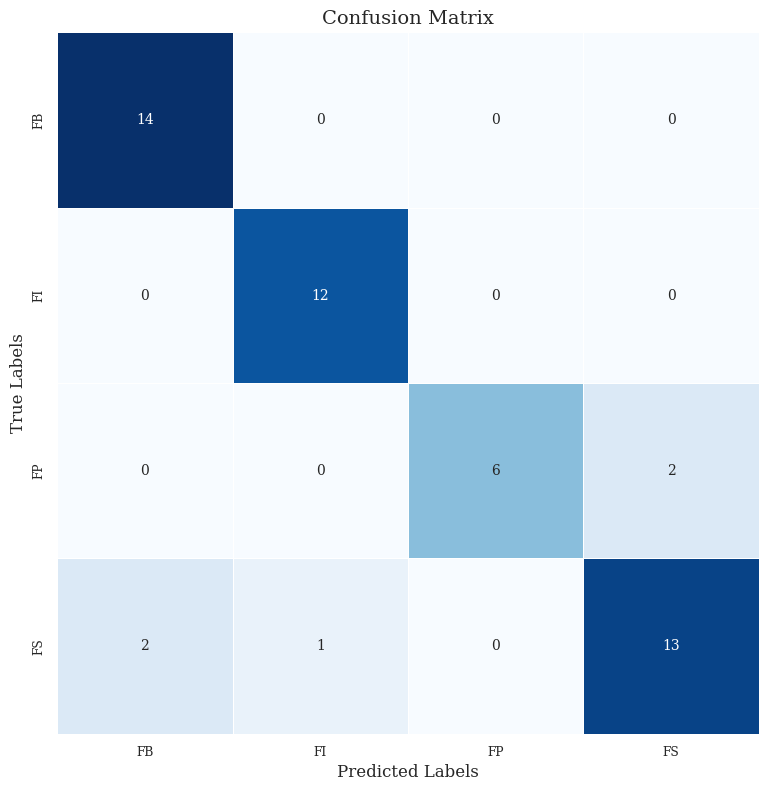


Distribution of classes for test:  SP
FS    16
FB    14
FI    12
FP     8
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix

# Step 1: Calculate the confusion matrix using true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Step 2: Set up the figure size for the heatmap
plt.figure(figsize=(8, 8))

# Step 3: Plot the heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues",
            square=True, annot_kws={"size": 10}, cbar=False)

# Define the class names based on the unique classes in the test set
class_names = np.unique(y_test)
# Add labels to the axes
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names)

# Add a title to the heatmap for clarity
plt.title('Confusion Matrix', fontsize=14)

# Adjust layout for better visualization
plt.tight_layout()

# Display the heatmap
plt.show()

print('\nDistribution of classes for test: ', y_test.value_counts())